### Web Scraping

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep

import requests
from bs4 import BeautifulSoup

headers = {
    'Host': 'www.ebay.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:70.0) Gecko/20100101 Firefox/70.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'TE': 'Trailers'
}

URL = "https://www.ebay.com/t/Fiction-Nonfiction-Books/261186/bn_1853762"
page = requests.get(URL, headers=headers)

soup = BeautifulSoup(page.content, "html.parser")

In [ ]:
results = soup.find(id="top-products-container-wrapper")
print(results)

title = results.find_all("h2", class_="title")
print(title[-1].text.strip())

<div class="width-cont" id="top-products-container-wrapper"><!--M#s0-0-18-5-0--><div class="lazy-loader-wrapper" id="s0-0-18-5-0"></div><!--M/--><!--M#s0-0-18-5-1--><div id="s0-0-18-5-1" style="display:none;"></div><!--M/--><div id="mainContent" role="main" tabindex="-1"><div class="navigation-bar clearfix"></div><div class="top-panel"><div class="app-tp-header-container clearfix"><h1 class="title-wrapper"><span class="title">Best selling products: Best <span class="cc-ts-BOLD">Fiction &amp; Nonfiction Books</span></span></h1><div class="pivots-wrapper"><div class="fake-tabs"><ul class="fake-tabs__items"><li class="fake-tabs__item fake-tabs__item--current"><a _sp="p2491336.m5417.l10030" aria-current="page" data-navsrc-tracking='[{"eventFamily":"PRP","eventAction":"ACTN","actionKind":"NAVSRC","operationId":"2491336","flushImmediately":false,"eventProperty":{"parentrq":"9eb940f81800ad924be149dcfffab98c","pageci":"c7132d9c-5f80-4464-9a81-2825f7dd743d","moduledtl":"mi:5417|li:10030"}},{"ac

In [ ]:
review = results.find_all("div", class_="reviews-aggregated-stars")
print(review[0].text.strip())

4.8 out of 5 stars based on 359 product ratings(359)


In [ ]:
price = results.find_all("div", class_="trending-price")
print(price[0].text.strip())

$37.00 New$35.00 Used


### Creating dataframe

In [ ]:
alls = []

for n,_ in enumerate(review):

  all = []

  try:

    book_name = title[n].text.split("by")[0][:-1]
    all.append(book_name)
    author = title[n].text.split("by")[1].split('(')[0][1:-1]
    all.append(author)
    year = title[n].text.split("by")[1].split('(')[1][0:4]
    all.append(year)
    book_cover = title[n].text.split(",")[-1][1:-1]
    all.append(book_cover)

    price_new = price[n].text.split("New")[0][1:-1]
    all.append(price_new)
    price_used = price[n].text.split("New")[1][1:-5]
    all.append(price_used)

    rating = review[n].text[:3]
    all.append(rating)
    number_of_ratings = review[n].text.split("(")[1][:-1]
    all.append(number_of_ratings)

  except:

    print(n)

  alls.append(all)

In [ ]:
df = pd.DataFrame(alls,columns=['Book Name','Author','Year','Book_cover','price_new','price_used','Rating','Customers_Rated'])
df.to_csv('ebay_products.csv', index=False, encoding='utf-8')

### Data Cleaning

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DS/Portfolio/Books and Wings/Data/ebay_products.csv")
df.tail()

,Book Name,Author,Year,Book_cover,price_new,price_used,Rating,Customers_Rated
95,Holy Quran With English Translation and Short ...,Malik Ghulam Fari,NaN,NaN,NaN,NaN,NaN,NaN
96,System Design Interview - an Insider's Guide,Alex X,NaN,NaN,NaN,NaN,NaN,NaN
97,Wings of Fire 8 Books Set,TUI T Sutherland,2017,Paperback,39.55,29.99,5.0,9.0
98,Healing with DMSO : The Complete Guide to Safe...,Amandha Dawn Vollmer,2020,Trade Paperback,14.34,13.10,5.0,9.0
99,How to Draw Comics the Marvel Way,"John Buscema, Stan Lee and John Buscema",1984,Trade Paperback,8.00,7.64,4.7,47.0


In [ ]:
df_book = df.copy()
df_book = df_book.dropna()

In [ ]:
df_book['Year']=df_book['Year'].str.extract('(\d+)', expand=False)
df_book = df_book[~df_book["Book_cover"].str.contains(r'[0-9]')]
df_book['price_used']=df_book['price_used'].str.extract('(\d+)', expand=False)

In [ ]:
df_book = df_book.dropna()

In [ ]:
len(df_book)

44

In [ ]:
df_book.to_csv('ebay_products_cleaned.csv', index=False, encoding='utf-8')

### Data Analysis

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df_book = pd.read_csv("/content/drive/MyDrive/DS/Portfolio/Books and Wings/Data/ebay_products_cleaned.csv")

In [7]:
df_book.tail()

,Book Name,Author,Year,Book_cover,price_new,price_used,Rating,Customers_Rated
39,"From Strength to Strength : Finding Success, H...",Arthur C. Brooks,2022,Hardcover,19.99,16,5.0,1.0
40,Las 48 Leyes del Poder,Joost Elffers and Robert Greene,2004,Trade Paperback,39.99,23,4.6,9.0
41,Wings of Fire 8 Books Set,TUI T Sutherland,2017,Paperback,39.55,29,5.0,9.0
42,Healing with DMSO : The Complete Guide to Safe...,Amandha Dawn Vollmer,2020,Trade Paperback,14.34,13,5.0,9.0
43,How to Draw Comics the Marvel Way,"John Buscema, Stan Lee and John Buscema",1984,Trade Paperback,8.00,7,4.7,47.0


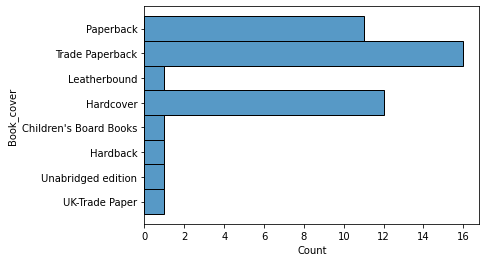

In [5]:
sns.histplot(data=df_book, y="Book_cover")

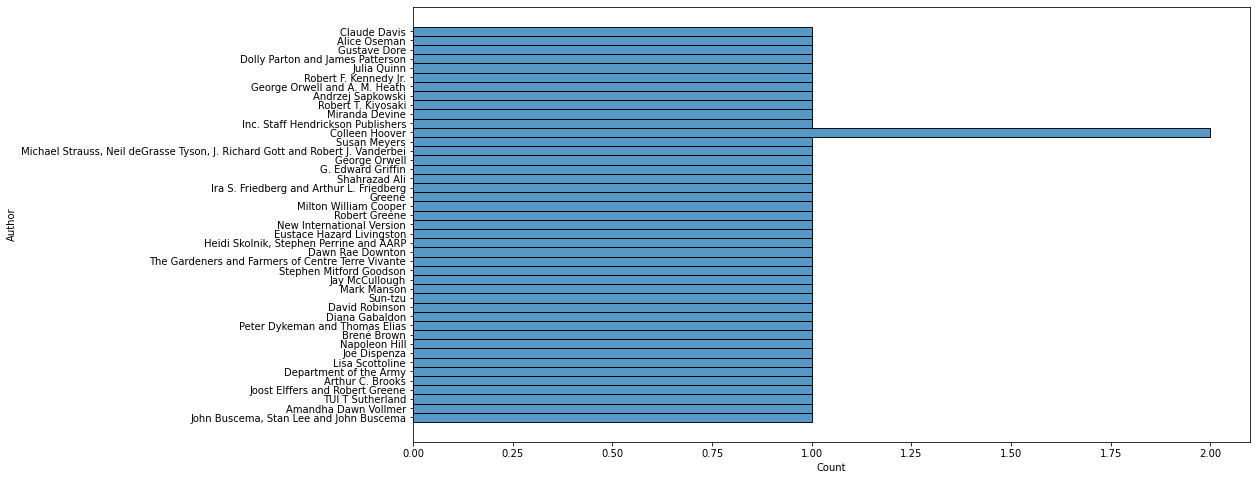

In [6]:
plt.figure(figsize=(15,8))
sns.histplot(data=df_book, y="Author")

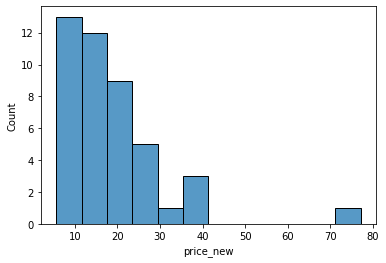

In [8]:
sns.histplot(data=df_book, x="price_new")

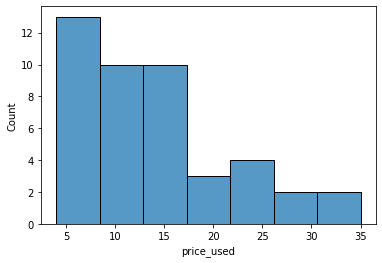

In [9]:
sns.histplot(data=df_book, x="price_used")

In [14]:
df_book.sort_values("price_new", ascending=False)[:5]

,Book Name,Author,Year,Book_cover,price_new,price_used,Rating,Customers_Rated
7,The Witcher Boxed Set,Andrzej Sapkowski,2020,Paperback,77.12,35,4.4,8.0
40,Las 48 Leyes del Poder,Joost Elffers and Robert Greene,2004,Trade Paperback,39.99,23,4.6,9.0
41,Wings of Fire 8 Books Set,TUI T Sutherland,2017,Paperback,39.55,29,5.0,9.0
0,The Lost Book of Herbal Remedies,Claude Davis,2018,Paperback,37.00,35,4.8,359.0
2,Holy Bible: King James Version (Barnes & Noble...,Gustave Dore,2018,Leatherbound,31.50,30,5.0,138.0


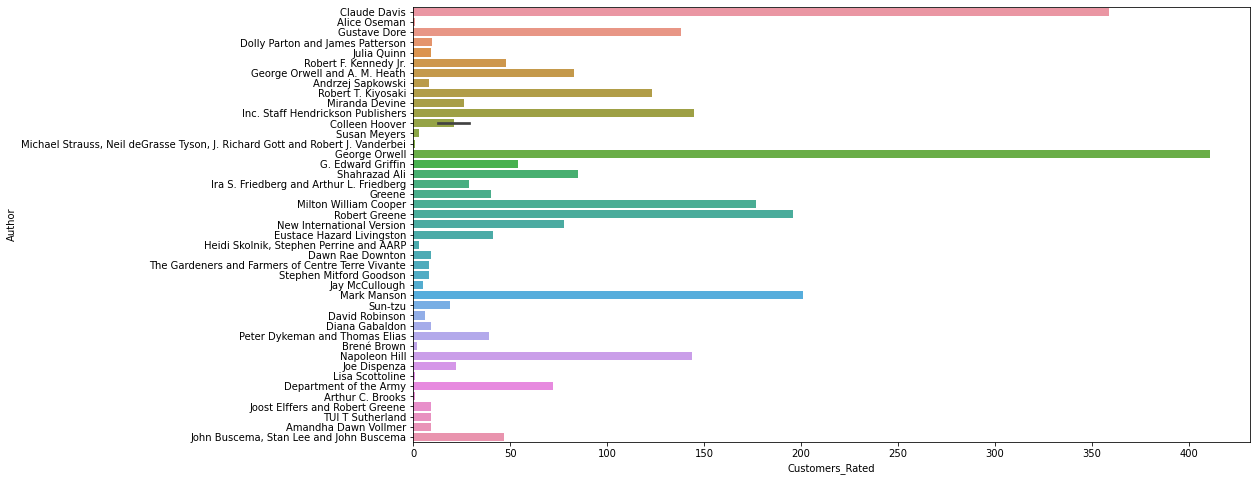

In [15]:
plt.figure(figsize=(15,8))
sns.barplot(y="Author", x="Customers_Rated", data=df_book)

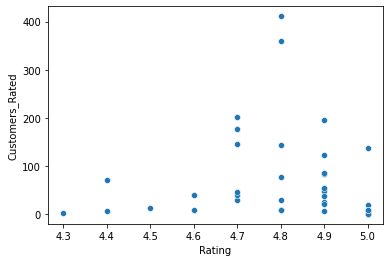

In [16]:
sns.scatterplot(data=df_book, x="Rating", y="Customers_Rated")

In [17]:
df_book.sort_values('Customers_Rated', ascending=False)[:10]

,Book Name,Author,Year,Book_cover,price_new,price_used,Rating,Customers_Rated
14,1984,George Orwell,1950,Hardback,8.36,4,4.8,411.0
0,The Lost Book of Herbal Remedies,Claude Davis,2018,Paperback,37.00,35,4.8,359.0
29,The Subtle Art of Not Giving a F*ck : A Counte...,Mark Manson,2016,Hardcover,12.51,9,4.7,201.0
20,The 48 Laws of Power,Robert Greene,2000,Paperback,15.52,7,4.9,196.0
19,Behold a Pale Horse,Milton William Cooper,1991,Paperback,19.06,17,4.7,177.0
10,The KJV Bible,Inc. Staff Hendrickson Publishers,2004,Hardcover,24.18,22,4.7,145.0
35,Think and Grow Rich: The Landmark Bestseller N...,Napoleon Hill,2005,Paperback,9.45,4,4.8,144.0
2,Holy Bible: King James Version (Barnes & Noble...,Gustave Dore,2018,Leatherbound,31.50,30,5.0,138.0
8,Rich Dad Poor Dad : What the Rich Teach Their ...,Robert T. Kiyosaki,2017,Paperback,9.68,5,4.9,123.0
16,The Blackman's Guide to Understanding the Blac...,Shahrazad Ali,1990,Paperback,25.00,23,4.9,85.0
